In [ ]:
import math
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
plays_final = pd.read_csv('plays_final.csv', index_col= 'Unnamed: 0')

In [ ]:
plays_final.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,coverage,Trips,Trips_Side,Routes,offense,defense
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,cover 3,No,NaN,OUT|MID|HITCH:HITCH,ATL,PHI
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,cover 3,No,NaN,HITCH:CROSS|MID|FLAT:HITCH,ATL,PHI
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,cover 3,No,NaN,SLANT:SLANT|MID|GO,ATL,PHI
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,cover 3,Yes,Left,HITCH:IN:CORNER|MID|,ATL,PHI
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,cover 0,No,NaN,GO|MID|GO,ATL,PHI


In [ ]:
split = plays_final['Routes'].str.split('|', n = 3, expand = True)

In [ ]:
plays_final['Left Routes'] = split[0]
plays_final['Right Routes'] = split[2]

In [ ]:
plays_final.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,coverage,Trips,Trips_Side,Routes,offense,defense,Left Routes,Right Routes
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,cover 3,No,NaN,OUT|MID|HITCH:HITCH,ATL,PHI,OUT,HITCH:HITCH
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,cover 3,No,NaN,HITCH:CROSS|MID|FLAT:HITCH,ATL,PHI,HITCH:CROSS,FLAT:HITCH
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,cover 3,No,NaN,SLANT:SLANT|MID|GO,ATL,PHI,SLANT:SLANT,GO
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,cover 3,Yes,Left,HITCH:IN:CORNER|MID|,ATL,PHI,HITCH:IN:CORNER,
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,cover 0,No,NaN,GO|MID|GO,ATL,PHI,GO,GO


In [ ]:
plays_grouped = plays_final.groupby(['Routes'])['playResult'].median()

In [ ]:
#plays_grouped.filter(lambda x: len(x) > 5).median()
#plays_grouped['playResult'].sort_values()
plays_grouped.head()

Routes
ANGLE|MID|CROSS:HITCH:GO        12.0
ANGLE|MID|GO:HITCH              21.0
CORNER:ANGLE|MID|CORNER:POST     0.0
CORNER:ANGLE|MID|IN:HITCH        0.0
CORNER:CORNER:CROSS|MID|POST     8.0
Name: playResult, dtype: float64

In [ ]:
coverage_group = plays_final.groupby(['coverage'])['gameId'].count()

In [ ]:
coverage_group.head(10)

coverage
cover 0            1056
cover 1 man        1117
cover 2              30
cover 2 man         135
cover 3           15539
match coverage     1362
Name: gameId, dtype: int64

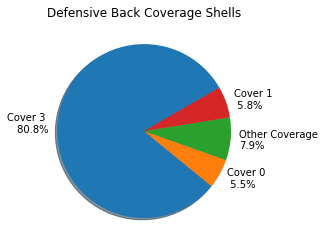

In [ ]:
plt.pie([15539, 1056, 1527, 1117], labels=['Cover 3 \n 80.8%', 'Cover 0\n 5.5%', 'Other Coverage\n7.9%', 'Cover 1 \n 5.8%'], shadow= True, startangle= 30, labeldistance = 1.1)
plt.title('Defensive Back Coverage Shells')
plt.show()

In [ ]:
#'Cover 3 \n 85.5%', 'Cover 1 \n 6.1%', 'Cover 2\n0.9%', 'Other Coverage\n7.5%'
#'Cover 3', 'Cover 1', 'Cover 2', 'Other Coverage'

In [ ]:
cover3 = plays_final.loc[(plays_final['coverage'] == 'cover 3')]# & (plays_final['passResult'] == 'C')

In [ ]:
three_count = cover3.groupby(['offenseFormation'])['playId'].count().values

In [ ]:
three = cover3.groupby(['offenseFormation'])['playResult'].mean().values
three_med = cover3.groupby(['offenseFormation'])['playResult'].median().values

In [ ]:
cover3.groupby(['offenseFormation'])['playResult'].count()

offenseFormation
EMPTY          1912
I_FORM          771
JUMBO            12
PISTOL          203
SHOTGUN       10144
SINGLEBACK     2357
WILDCAT          27
Name: playResult, dtype: int64

In [ ]:
cover3.groupby(['offenseFormation'])['playResult'].count()

offenseFormation
EMPTY          1912
I_FORM          771
JUMBO            12
PISTOL          203
SHOTGUN       10144
SINGLEBACK     2357
WILDCAT          27
Name: playResult, dtype: int64

In [ ]:
cover1 = plays_final.loc[(plays_final['coverage'] == 'cover 1 man')]

In [ ]:
one =cover1.groupby(['offenseFormation'])['playResult'].mean().values
one_med =cover1.groupby(['offenseFormation'])['playResult'].median().values

In [ ]:
cover1.groupby(['offenseFormation'])['playResult'].count()

offenseFormation
EMPTY         162
I_FORM         41
PISTOL         14
SHOTGUN       775
SINGLEBACK    122
WILDCAT         1
Name: playResult, dtype: int64

In [ ]:
one_count = cover1.groupby(['offenseFormation'])['playResult'].count().values

In [ ]:
cover0 = plays_final.loc[(plays_final['coverage'] == 'cover 0')]

In [ ]:
zero = cover0.groupby(['offenseFormation'])['playResult'].mean().values
zero_med = cover0.groupby(['offenseFormation'])['playResult'].median().values

In [ ]:
cover0.groupby(['offenseFormation'])['playResult'].mean()

offenseFormation
EMPTY         5.222222
I_FORM        8.864865
JUMBO         0.000000
PISTOL        1.357143
SHOTGUN       4.405442
SINGLEBACK    6.033898
WILDCAT       0.000000
Name: playResult, dtype: float64

In [ ]:
zero_count = cover0.groupby(['offenseFormation'])['playResult'].count().values

In [ ]:
othercov = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man')]

In [ ]:
other = othercov.groupby(['offenseFormation'])['playResult'].mean().values
other_med = othercov.groupby(['offenseFormation'])['playResult'].median().values

In [ ]:
othercov.groupby(['offenseFormation'])['playResult'].count()

offenseFormation
EMPTY         210
I_FORM         66
JUMBO          34
PISTOL         20
SHOTGUN       973
SINGLEBACK    193
WILDCAT         6
Name: playResult, dtype: int64

In [ ]:
other_count = othercov.groupby(['offenseFormation'])['playResult'].count().values

<function matplotlib.pyplot.plot>

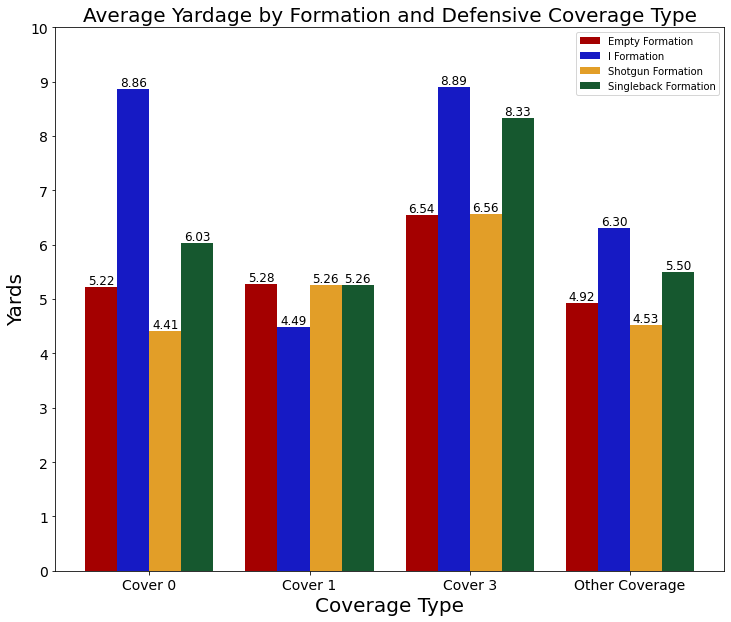

In [ ]:
Empty = [zero[0], one[0], three[0], other[0]]
I_form = [zero[1], one[1], three[1], other[1]]
#Jumbo = [zero[2], one[2], three[2], other[2]]
#Pistol = [zero[3], one[3], three[3], other[3]]
Shotgun = [zero[4], one[4], three[4], other[4]]
Singleback = [zero[5], one[4], three[5], other[5]]
#x_locs = np.arange(4)
x_locs= np.array([1, 5, 9, 13])
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111)
width = .8
bar1 = ax.bar(x_locs, Empty, width, color = '#a40000', label = 'Empty Formation')
for pos in bar1:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar2 = ax.bar(x_locs + width, I_form, width, color = '#161ac4', label= 'I Formation')
for pos in bar2:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
#bar3 = ax.bar(x_locs + width *2, Jumbo, width, color = 'b')
#bar4 = ax.bar(x_locs + width *3, Pistol, width, color = '#b76c00')
bar3 = ax.bar(x_locs + width *2, Shotgun, width, color = '#e29e28', label = 'Shotgun Formation')
for pos in bar3:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar4 = ax.bar(x_locs + width *3, Singleback, width, color = '#16582f', label = 'Singleback Formation')
for pos in bar4:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
ax.legend()
plt.title('Average Yardage by Formation and Defensive Coverage Type', fontsize = 20)
plt.ylabel('Yards', fontsize = 20)
plt.xlabel('Coverage Type', fontsize = 20)
plt.xticks([2.2, 6.2, 10.2, 14.2], ['Cover 0', 'Cover 1', 'Cover 3', 'Other Coverage'], fontsize = 14)
plt.yticks([x for x in range(11)], fontsize = 14)
plt.plot

<function matplotlib.pyplot.plot>

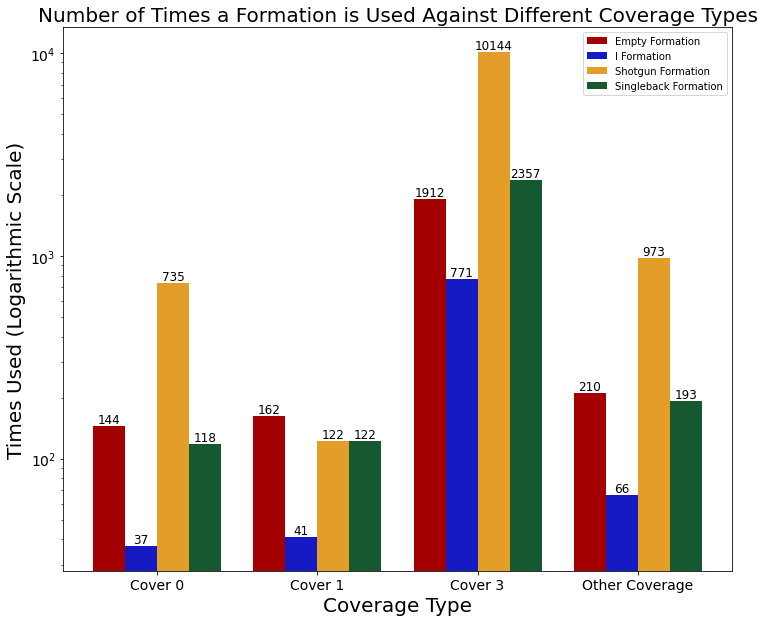

In [ ]:
Empty = [zero_count[0], one_count[0], three_count[0], other_count[0]]
I_form = [zero_count[1], one_count[1], three_count[1], other_count[1]]
#Jumbo = [zero[2], one[2], three[2], other[2]]
#Pistol = [zero[3], one[3], three[3], other[3]]
Shotgun = [zero_count[4], one_count[4], three_count[4], other_count[4]]   
Singleback = [zero_count[5], one_count[4], three_count[5], other_count[5]]
#x_locs = np.arange(4)
x_locs= np.array([1, 5, 9, 13])
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111)
width = .8
bar1 = ax.bar(x_locs, Empty, width, color = '#a40000', label = 'Empty Formation')
for pos in bar1:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar2 = ax.bar(x_locs + width, I_form, width, color = '#161ac4', label= 'I Formation')
for pos in bar2:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
#bar3 = ax.bar(x_locs + width *2, Jumbo, width, color = 'b')
#bar4 = ax.bar(x_locs + width *3, Pistol, width, color = '#b76c00')
bar3 = ax.bar(x_locs + width *2, Shotgun, width, color = '#e29e28', label = 'Shotgun Formation')
for pos in bar3:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar4 = ax.bar(x_locs + width *3, Singleback, width, color = '#16582f', label = 'Singleback Formation')
for pos in bar4:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
ax.legend()
plt.title('Number of Times a Formation is Used Against Different Coverage Types', fontsize = 20)
plt.ylabel('Times Used (Logarithmic Scale)', fontsize = 20)
plt.xlabel('Coverage Type', fontsize = 20)
plt.xticks([2.2, 6.2, 10.2, 14.2], ['Cover 0', 'Cover 1', 'Cover 3', 'Other Coverage'], fontsize = 14)
plt.yticks([x for x in range(11)], fontsize = 14)
plt.yscale('log')
plt.plot

In [ ]:
def team_scouter():
  limit = True
  while limit: 
    team = input("Enter a Team's abreviation to scout, e.g. PHI for the Eagles")
    if team in plays_final['defense'].unique():
      limit = False
  cover3 = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team)]
  cover1 = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team)]
  cover0 = plays_final.loc[(plays_final['coverage'] == 'cover 0')  & (plays_final['defense'] == team)]
  othercov = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team)]
  #Get counts of each formation for the team entered
  cover0_empty = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].mean()
  cover1_empty = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].mean()
  cover3_empty = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].mean()
  other_empty = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].mean()
  #IFORM
  cover0_iform = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].mean()
  cover1_iform = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].mean()
  cover3_iform = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].mean()
  other_iform = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].mean()
  #Shotgun
  cover0_shot = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].mean()
  cover1_shot = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].mean()
  cover3_shot = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].mean()
  other_shot = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].mean()
  #Singleback
  cover0_single = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].mean()
  cover1_single = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].mean()
  cover3_single = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].mean()
  other_single = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].mean()
  #Get the average yardage for each coverage type for the team entered


  #Plot average yardage
  Empty = [cover0_empty, cover1_empty, cover3_empty, other_empty]
  I_form = [cover0_iform, cover1_iform, cover3_iform, other_iform]
  Shotgun = [cover0_shot, cover1_shot, cover3_shot, other_shot]
  Singleback = [cover0_single, cover1_single, cover3_single, other_single]
  for x in [Empty, I_form, Shotgun, Singleback]:
    for num, y in enumerate(x):
      if y is np.nan:
        x[num] = 0
  #x_locs = np.arange(4)
  x_locs= np.array([1, 5, 9, 13])
  fig = plt.figure(figsize = (12, 10))
  ax = fig.add_subplot(111)
  width = .8
  bar1 = ax.bar(x_locs, Empty, width, color = '#a40000', label = 'Empty Formation')
  for pos in bar1:
    if pos.get_height() < 0:
      ax.text(pos.get_x() + .4, pos.get_height() *1.1, '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
    else:
      ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  bar2 = ax.bar(x_locs + width, I_form, width, color = '#161ac4', label= 'I Formation')
  for pos in bar2:
    if pos.get_height() < 0:
      ax.text(pos.get_x() + .4, pos.get_height() *1.1, '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
    else:
      ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  #bar3 = ax.bar(x_locs + width *2, Jumbo, width, color = 'b')
  #bar4 = ax.bar(x_locs + width *3, Pistol, width, color = '#b76c00')
  bar3 = ax.bar(x_locs + width *2, Shotgun, width, color = '#e29e28', label = 'Shotgun Formation')
  for pos in bar3:
    if pos.get_height() < 0:
      ax.text(pos.get_x() + .4, pos.get_height() *1.1, '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
    else:
      ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  bar4 = ax.bar(x_locs + width *3, Singleback, width, color = '#16582f', label = 'Singleback Formation')
  for pos in bar4:
    if pos.get_height() < 0:
      ax.text(pos.get_x() + .4, pos.get_height() *1.1, '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
    else:
      ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  ax.legend()
  plt.title('Average Yardage Allowed by {}, by Coverage and Formation'.format(team), fontsize = 20)
  plt.ylabel('Yards', fontsize = 20)
  plt.xlabel('Coverage Type', fontsize = 20)
  plt.xticks([2.2, 6.2, 10.2, 14.2], ['Cover 0', 'Cover 1', 'Cover 3', 'Other Coverage'], fontsize = 14)
  #plt.yticks([x for x in range(11)], fontsize = 14)
  plt.plot

  ####
  cover0_empty = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].count()
  cover1_empty = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].count()
  cover3_empty = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].count()
  other_empty = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].count()
  #IFORM
  cover0_iform = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].count()
  cover1_iform = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].count()
  cover3_iform = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].count()
  other_iform = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'I_FORM')]['playResult'].count()
  #Shotgun
  cover0_shot = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].count()
  cover1_shot = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].count()
  cover3_shot = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].count()
  other_shot = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SHOTGUN')]['playResult'].count()
  #Singleback
  cover0_single = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].count()
  cover1_single = plays_final.loc[(plays_final['coverage'] == 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].count()
  cover3_single = plays_final.loc[(plays_final['coverage'] == 'cover 3') & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].count()
  other_single = plays_final.loc[(plays_final['coverage'] != 'cover 3') & (plays_final['coverage'] != 'cover 0') & (plays_final['coverage'] != 'cover 1 man') & (plays_final['defense'] == team) & (plays_final['defense'] == team) & (plays_final['offenseFormation'] == 'SINGLEBACK')]['playResult'].count()



  Empty = [cover0_empty, cover1_empty, cover3_empty, other_empty]
  I_form = [cover0_iform, cover1_iform, cover3_iform, other_iform]
  Shotgun = [cover0_shot, cover1_shot, cover3_shot, other_shot]
  Singleback = [cover0_single, cover1_single, cover3_single, other_single]
  #x_locs = np.arange(4)
  x_locs= np.array([1, 5, 9, 13])
  fig = plt.figure(figsize = (12, 10))
  ax = fig.add_subplot(111)
  width = .8
  bar1 = ax.bar(x_locs, Empty, width, color = '#a40000', label = 'Empty Formation')
  for pos in bar1:
    ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  bar2 = ax.bar(x_locs + width, I_form, width, color = '#161ac4', label= 'I Formation')
  for pos in bar2:
    ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
    ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  #bar3 = ax.bar(x_locs + width *2, Jumbo, width, color = 'b')
  #bar4 = ax.bar(x_locs + width *3, Pistol, width, color = '#b76c00')
  bar3 = ax.bar(x_locs + width *2, Shotgun, width, color = '#e29e28', label = 'Shotgun Formation')
  for pos in bar3:
    ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  bar4 = ax.bar(x_locs + width *3, Singleback, width, color = '#16582f', label = 'Singleback Formation')
  for pos in bar4:
    ax.text(pos.get_x() + .4, pos.get_height(), '{:}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
  ax.legend()
  plt.title('Formations Used Against {}, by Coverage Type'.format(team), fontsize = 20)
  plt.ylabel('Times Used (Logarithmic Scale)', fontsize = 20)
  plt.xlabel('Coverage Type', fontsize = 20)
  plt.xticks([2.2, 6.2, 10.2, 14.2], ['Cover 0', 'Cover 1', 'Cover 3', 'Other Coverage'], fontsize = 14)
  #plt.yticks([x for x in range(11)], fontsize = 14)
  plt.yscale('symlog')
  plt.yticks([0, 10, 100, 1000])
  plt.plot

Enter a Team's abreviation to scout, e.g. PHI for the EaglesATL


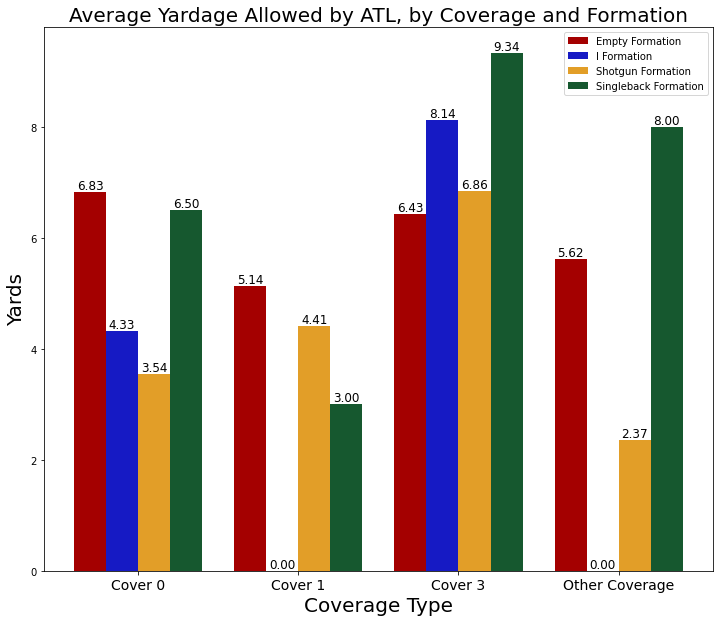

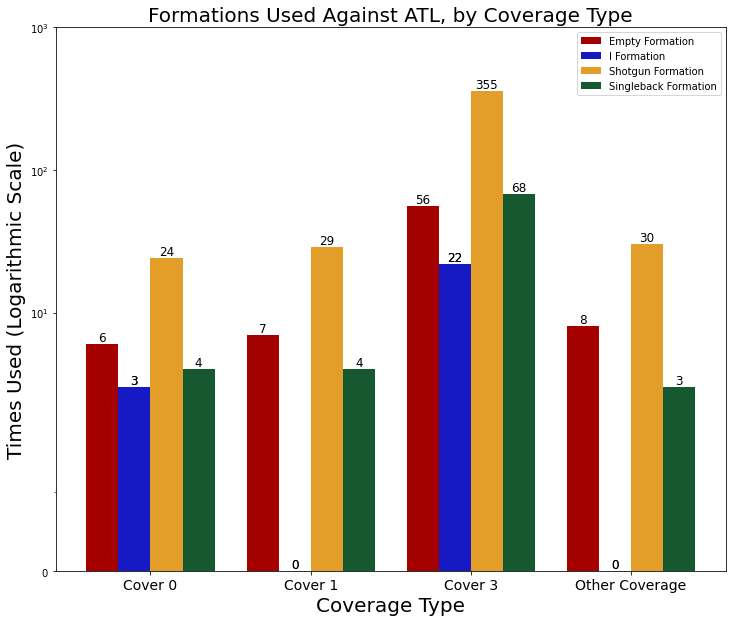

In [ ]:
team_scouter()

<function matplotlib.pyplot.plot>

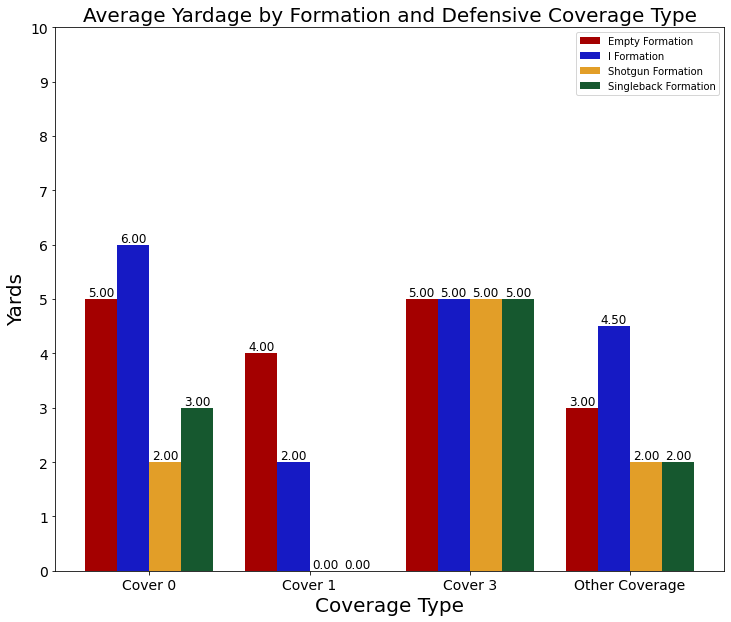

In [ ]:
Empty = [zero_med[0], one_med[0], three_med[0], other_med[0]]
I_form = [zero_med[1], one_med[1], three_med[1], other_med[1]]
#Jumbo = [zero[2], one[2], three[2], other[2]]
#Pistol = [zero[3], one[3], three[3], other[3]]
Shotgun = [zero_med[4], one_med[4], three_med[4], other_med[4]]
Singleback = [zero_med[5], one_med[4], three_med[5], other_med[5]]
#x_locs = np.arange(4)
x_locs= np.array([1, 5, 9, 13])
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111)
width = .8
bar1 = ax.bar(x_locs, Empty, width, color = '#a40000', label = 'Empty Formation')
for pos in bar1:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar2 = ax.bar(x_locs + width, I_form, width, color = '#161ac4', label= 'I Formation')
for pos in bar2:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
#bar3 = ax.bar(x_locs + width *2, Jumbo, width, color = 'b')
#bar4 = ax.bar(x_locs + width *3, Pistol, width, color = '#b76c00')
bar3 = ax.bar(x_locs + width *2, Shotgun, width, color = '#e29e28', label = 'Shotgun Formation')
for pos in bar3:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
bar4 = ax.bar(x_locs + width *3, Singleback, width, color = '#16582f', label = 'Singleback Formation')
for pos in bar4:
  ax.text(pos.get_x() + .4, pos.get_height(), '{:.2f}'.format(pos.get_height()), ha='center', va ='bottom', fontsize = 12)
ax.legend()
plt.title('Average Yardage by Formation and Defensive Coverage Type', fontsize = 20)
plt.ylabel('Yards', fontsize = 20)
plt.xlabel('Coverage Type', fontsize = 20)
plt.xticks([2.2, 6.2, 10.2, 14.2], ['Cover 0', 'Cover 1', 'Cover 3', 'Other Coverage'], fontsize = 14)
plt.yticks([x for x in range(11)], fontsize = 14)
plt.plot

In [ ]:
cover0_empty = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == 'PHI') & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].mean()

In [ ]:
cover0_empty

nan

In [ ]:
plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == 'PHI')].offenseFormation.unique()

array(['SHOTGUN', 'SINGLEBACK', 'I_FORM'], dtype=object)

In [ ]:
cover0_empty = plays_final.loc[(plays_final['coverage'] == 'cover 0') & (plays_final['defense'] == 'PHI') & (plays_final['offenseFormation'] == 'EMPTY')]['playResult'].count()

In [ ]:
cover0_empty

0